# IPL DATA

### importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Impoting Required Datas

In [2]:
matches = pd.read_csv('ipl/matches.csv')
deliveries = pd.read_csv('ipl/deliveries.csv')


### Generating Number of games played at each stadium for each season

In [3]:
matches_season = pd.crosstab(matches.season, matches.venue)

## Plotting Graphs 

### Graphs for each season seperately

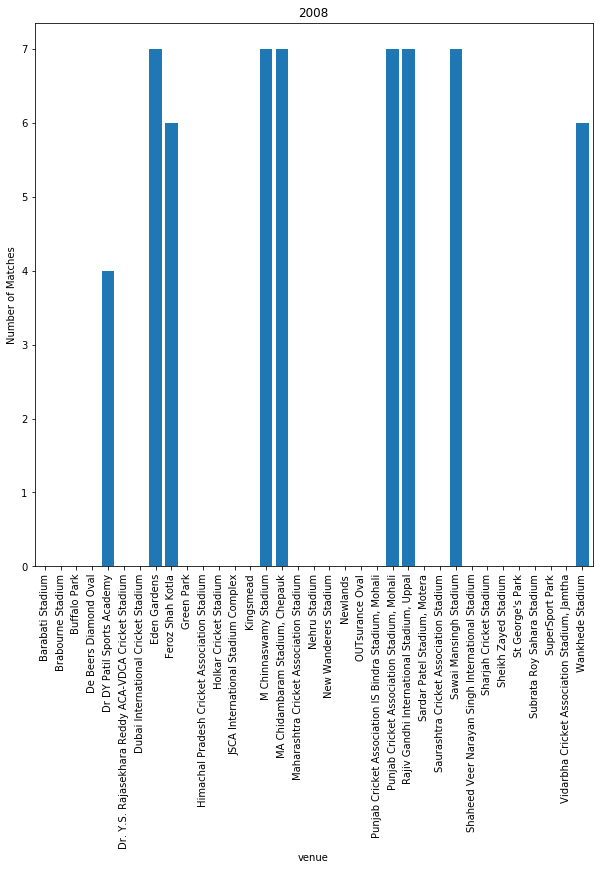

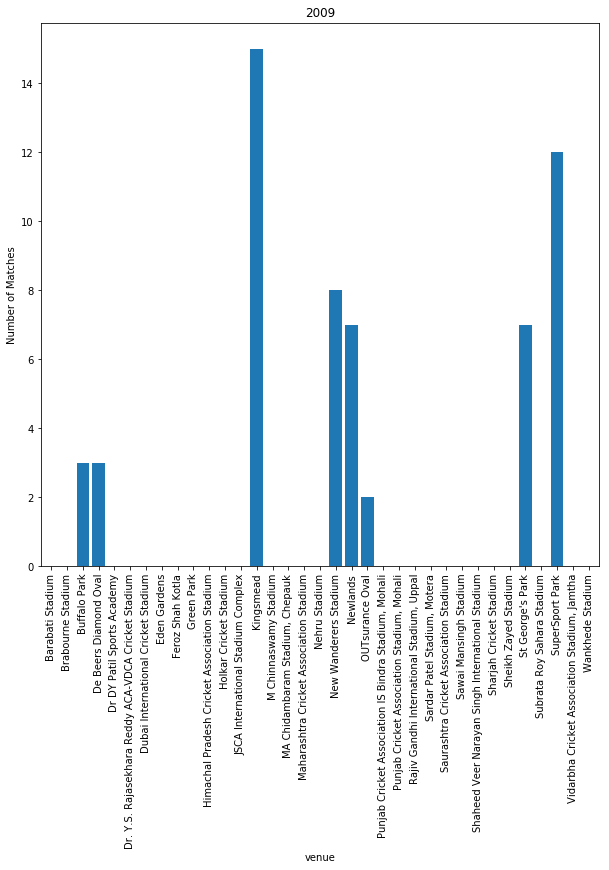

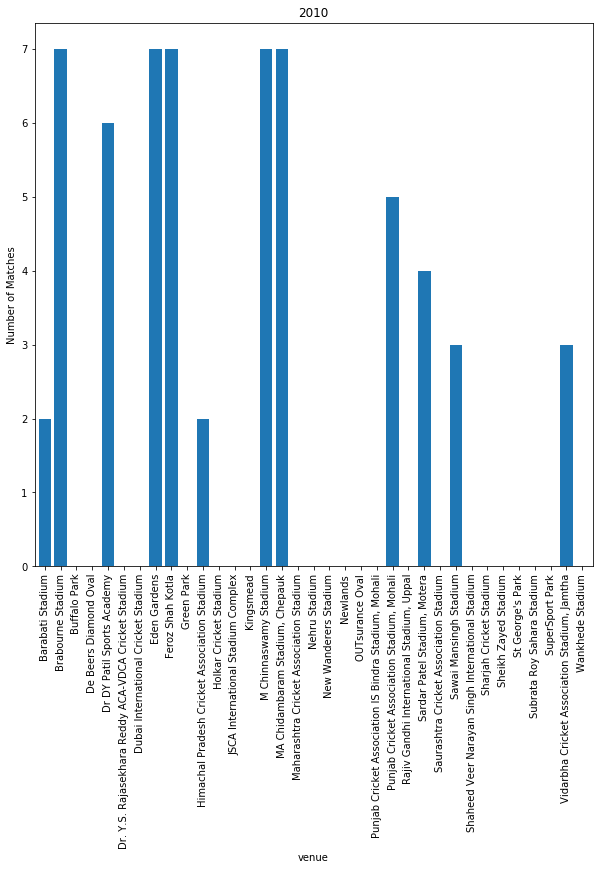

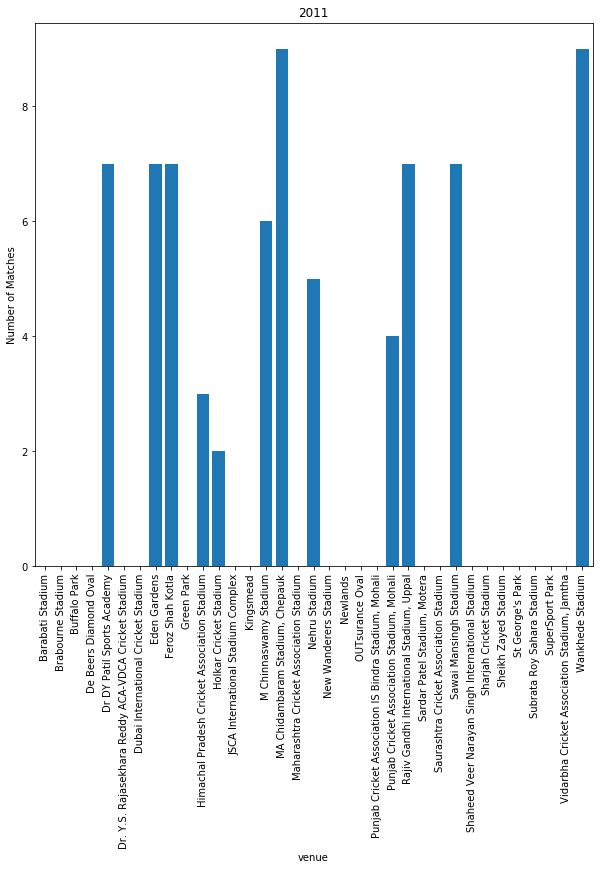

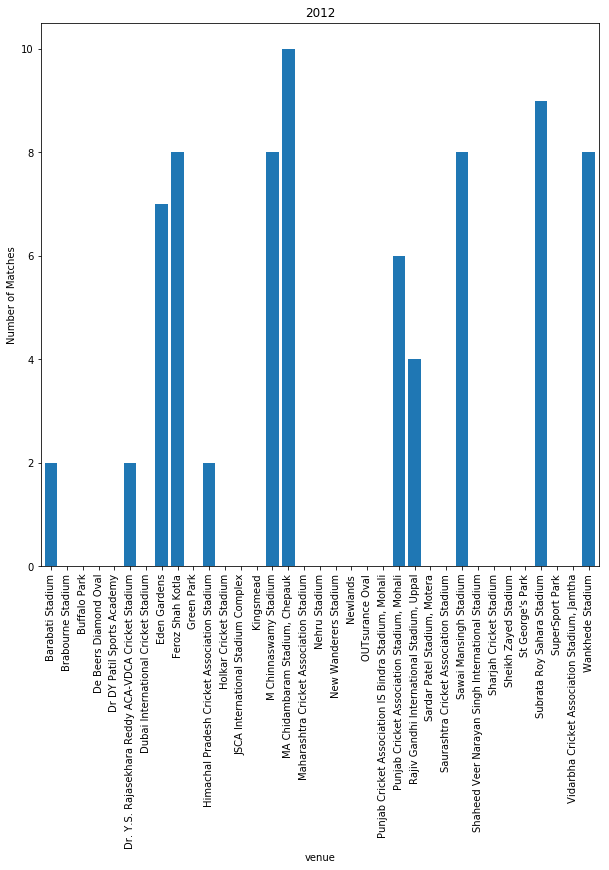

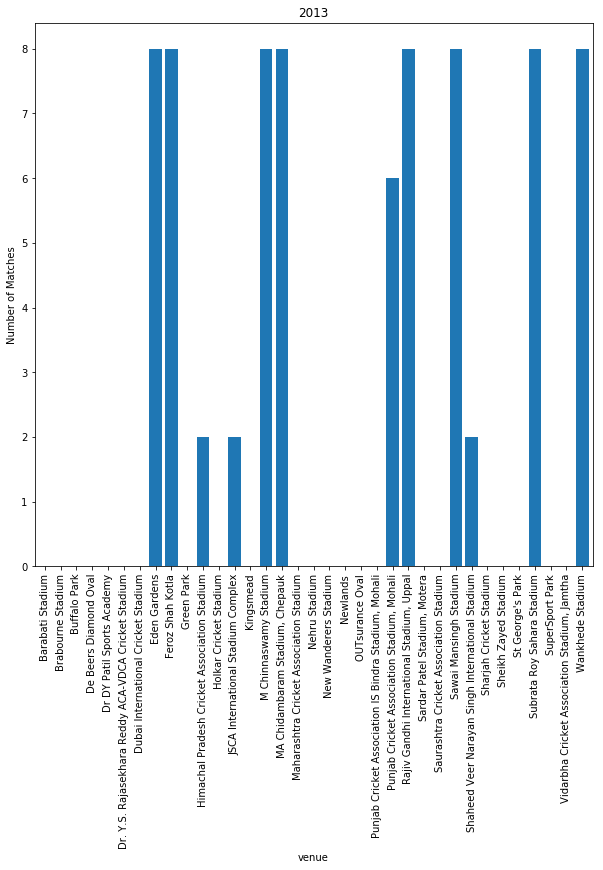

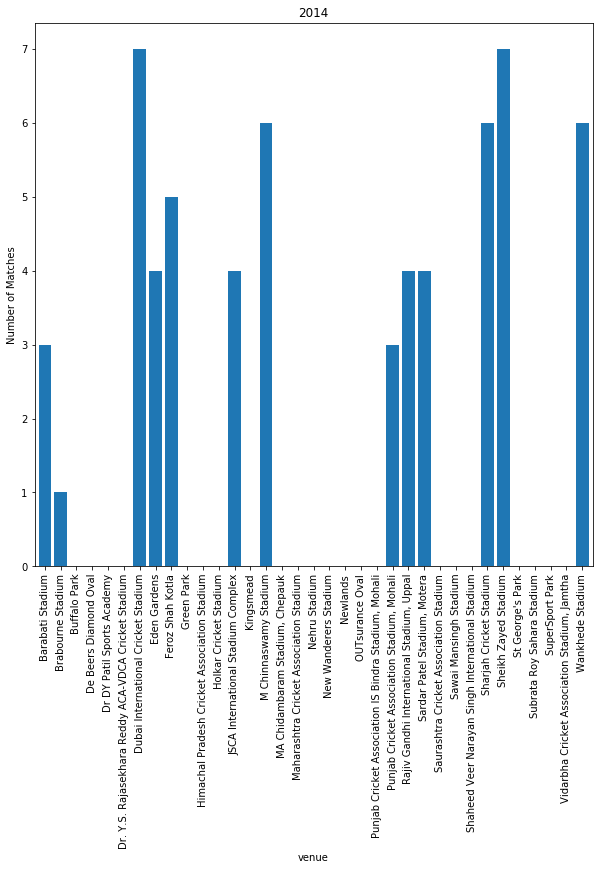

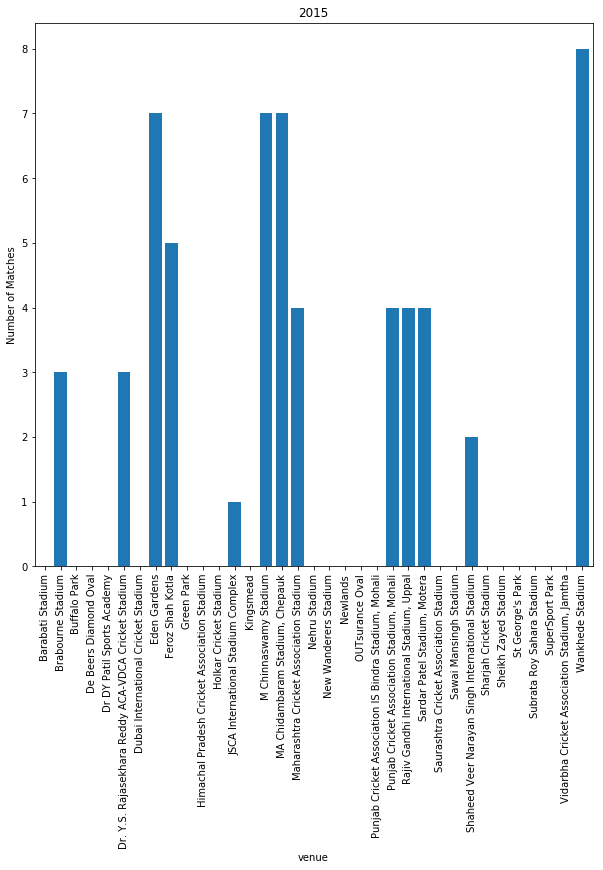

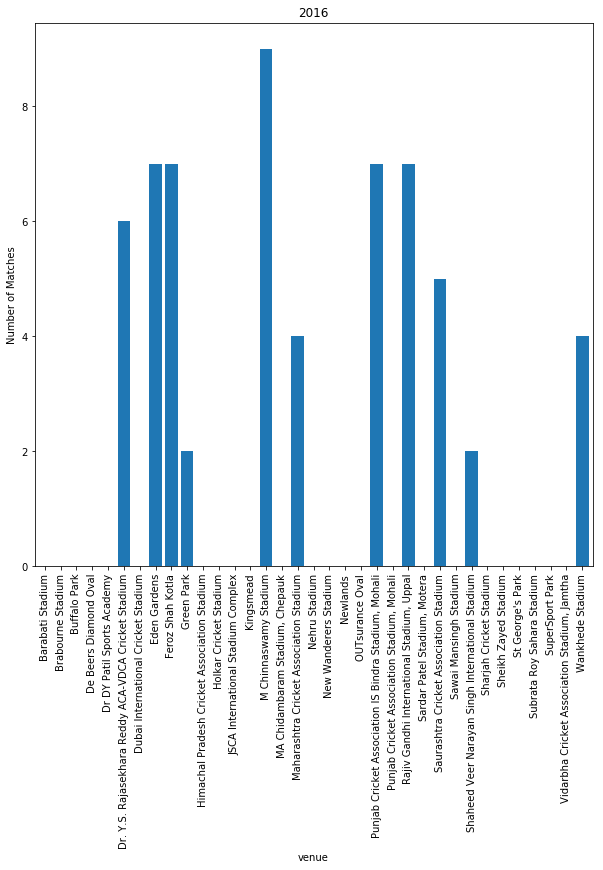

In [4]:
for sess in matches_season.index:
    matches_season.loc[sess,:].plot(kind='bar', width=0.8, figsize=(10,10))
    plt.title(sess)
    
    plt.ylabel('Number of Matches')
    plt.show()

### Plotting for all season in one graph

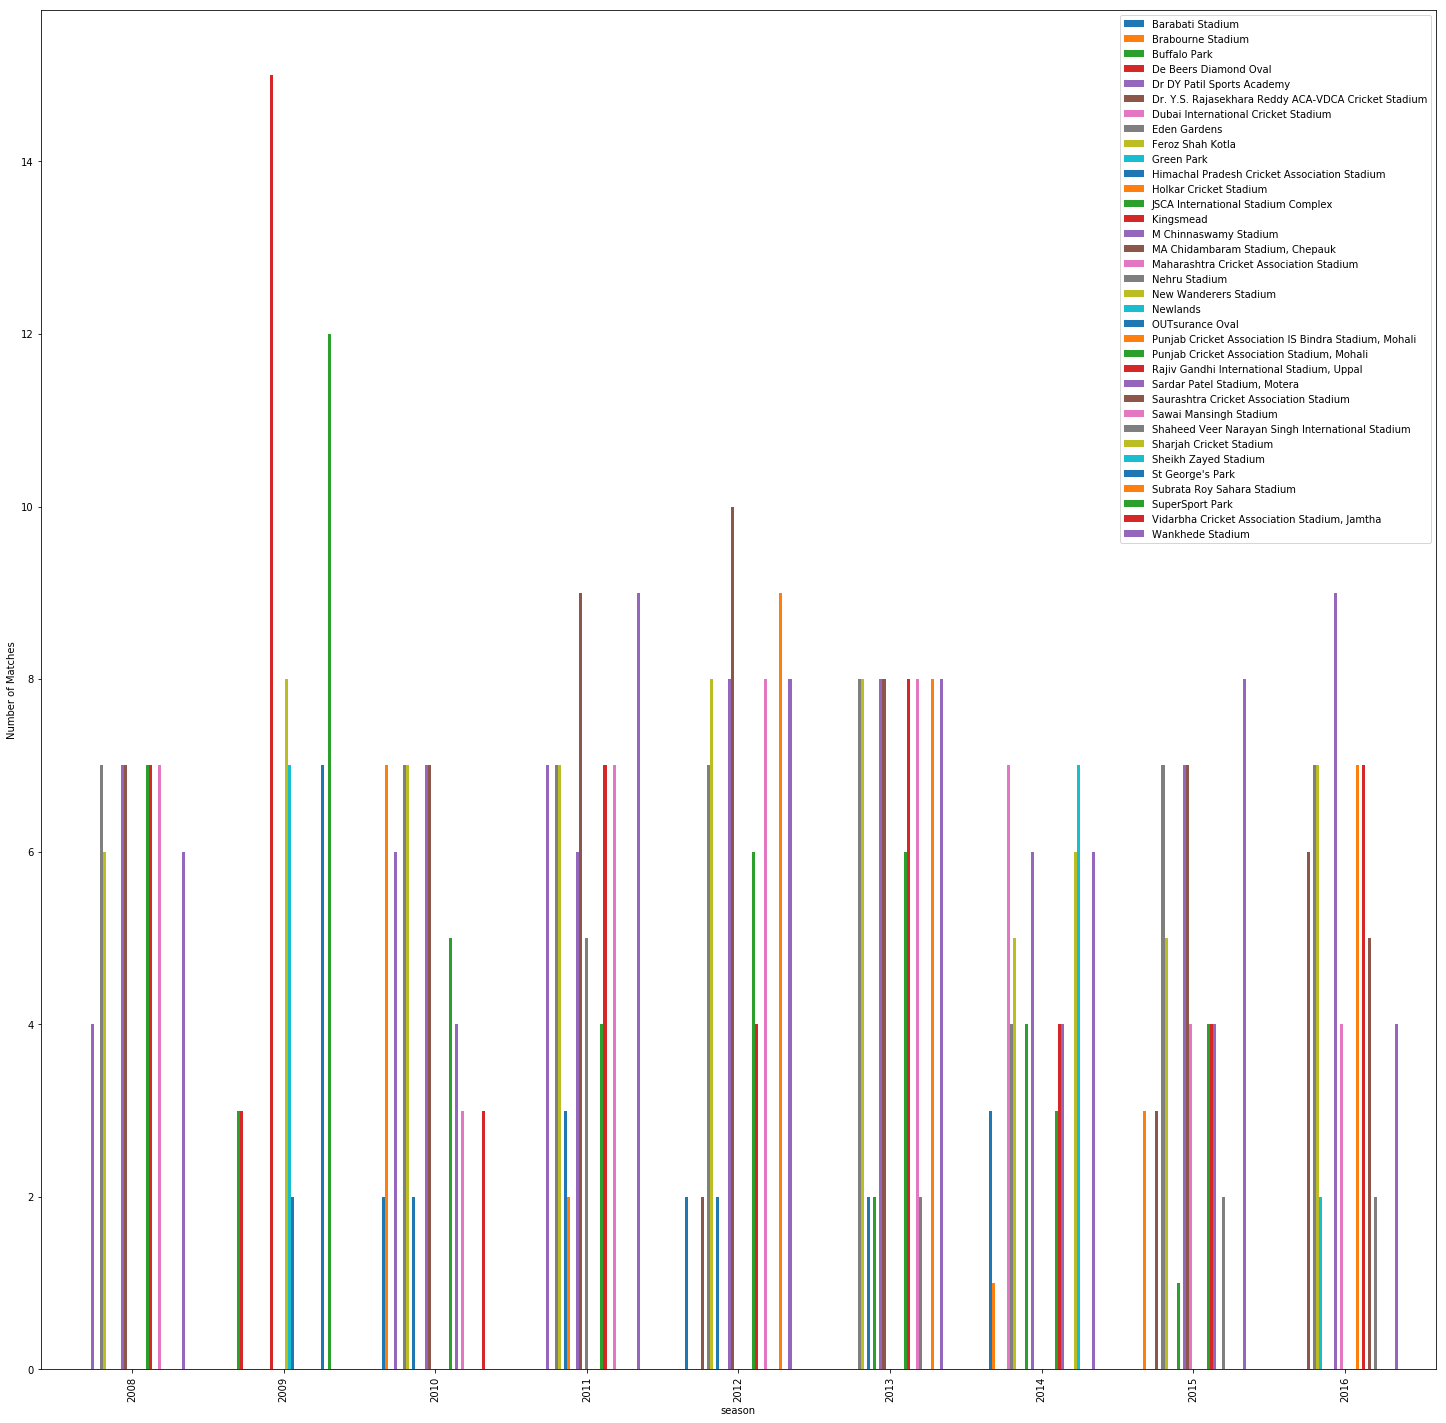

In [5]:
matches_season.plot(kind = 'bar',width = 0.7,figsize = (25,25))
plt.legend()
plt.ylabel('Number of Matches')
plt.show()

# Assignment2

### filtering data to select matches with id between 500-550

In [6]:
required_matches = matches.query('500 <= id <= 550')

### calculating matches played at each venue

In [7]:
required_matches = required_matches['venue'].value_counts()

### Generating Dataframe to use the plot function

In [8]:
required_matches = pd.DataFrame(required_matches)

### Plotting the graph

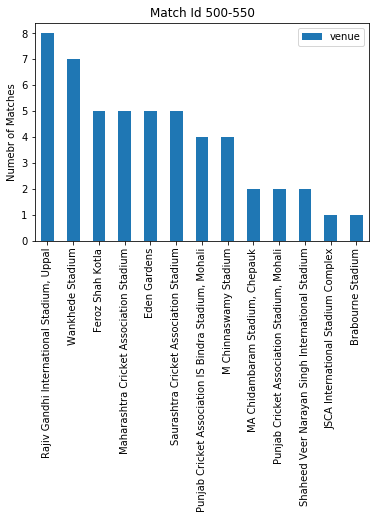

In [9]:
required_matches.plot(kind = 'bar')
plt.ylabel('Numebr of Matches')
plt.title('Match Id 500-550')
plt.show()

# Assign 3

### Merging Tables to get match id with venue

In [10]:
matches.rename(columns = {'id':'match_id'}, inplace = True)
merged_data = pd.merge(matches, deliveries, on = 'match_id')

### seperating innings wise data

In [11]:
inng_1 = merged_data[merged_data.inning == 1]
inng_2 = merged_data[merged_data.inning == 2]

### Calculating score per inning

In [12]:
t_1 = pd.crosstab(inng_1.venue, inng_1.total_runs)
t_2 = pd.crosstab(inng_2.venue, inng_2.total_runs)

In [13]:
#multiplying number of times score(x) *score(x) to get score value 
for col in t_1.columns:
    t_1.loc[:,col] = t_1.loc[:,col]*t_1.columns[col]

for col in t_2.columns:
    t_2.loc[:,col] = t_2.loc[:,col]*t_2.columns[col]

### Summing up to get total score

In [14]:
t_1['t1_runs'] = t_1.sum(axis = 1)
t_2['t2_runs'] = t_2.sum(axis = 1)

### Dropping unecessary columns

In [15]:
t_1.drop([0,1,2,3,4,5,6,7],axis = 1, inplace = True)
t_2.drop([0,1,2,3,4,5,6,7],axis = 1, inplace = True)

### Creating desired dataframe 

### Concatinating inng1_runs and inng2_runs. And calculating total runs

In [16]:
final_df = pd.concat([t_1,t_2], axis = 1)
final_df.columns.name = None

### Concatinating with Number of matches played at each Stadium

In [17]:
final_df = pd.concat([final_df,matches['venue'].value_counts()],axis=1)
final_df.rename(columns = {'venue':'num_matches'}, inplace = True)

### Updating Runs with avg runs

In [18]:
final_df['t1_runs'] = final_df['t1_runs'] / final_df['num_matches']
final_df['t2_runs'] = final_df['t2_runs'] / final_df['num_matches']

### removing unecessary columns from DataFrame

In [19]:
final_df.drop('num_matches',axis = 1, inplace = True)

### Plotting Required Graph from DataFrame

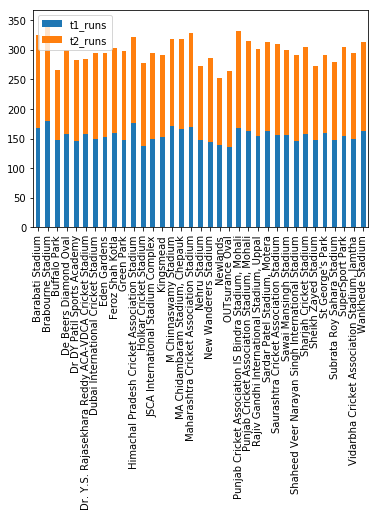

In [20]:
final_df.plot(kind='bar',stacked=True)
plt.show()